## Homework 3: Data exploration and visualization

In this homework you will practice manipulating, exploring and visualizing data in order to answer questions about the data.

Before you begin, download this notebook, and the files "data/hw3_health_w.txt" and "data/hw3_health_m.txt" to your computer and copy them to your own repository. As we discussed in the last class, the easiest way to do that is if you clone the class repository in a separate folder on your computer with the command:

```git clone https://github.com/venpopov/DataSciencePsychUZH```

If you have already cloned previously the class repository, you can update it on your computer with the new files by "pulling" information from github via the following command, which you need to run while your terminal is in your "DataSciencePsychUZH" folder:

```git pull```



### Loading and manipulating data

The datasets `hw3_health_m.txt` and `hw3_health_w.txt` contain data for the average number of steps per day and the BMI index for a number of men and women, respectively.

First, load the two datasets via the `read.table()` command. You need to specify that the first row of the files contains the variable names, by setting the `header = TRUE` argument in the `read.table()` command **(1 point)**:

In [5]:
health_m <- read.table('hw3_health_m.txt', header = TRUE) 
health_w <- read.table('hw3_health_w.txt', header = TRUE)

Use the `str()` and `head()` commands to become familiar with the structure of the datasets **(1 point)**

In [6]:
str(health_m)
str(health_w)

head(health_m)
head(health_w)


'data.frame':	865 obs. of  3 variables:
 $ ID   : int  1 2 6 7 8 10 11 13 17 18 ...
 $ steps: int  15000 15000 14861 14861 14699 14560 14560 14560 14560 14560 ...
 $ bmi  : num  16.9 16.9 16.8 16.8 17.3 20.5 20.6 20.5 20.4 20.4 ...
'data.frame':	921 obs. of  3 variables:
 $ ID   : int  3 4 5 9 12 14 15 16 21 23 ...
 $ steps: int  15000 14861 14861 14699 14560 14560 14560 14560 14560 14560 ...
 $ bmi  : num  17 17.2 17.2 16.8 20.4 20.5 20.5 20.5 19.7 19.6 ...


,ID,steps,bmi
,<int>,<int>,<dbl>
1,1,15000,16.9
2,2,15000,16.9
3,6,14861,16.8
4,7,14861,16.8
5,8,14699,17.3
6,10,14560,20.5


,ID,steps,bmi
,<int>,<int>,<dbl>
1,3,15000,17.0
2,4,14861,17.2
3,5,14861,17.2
4,9,14699,16.8
5,12,14560,20.4
6,14,14560,20.5


Based on the output from the `str()` command, how many men and women is there data for? **(1 point)**
There are 865 observations for men and 921 for woman

Based on what you learned in the previous homework, are these datasets tidy? Please explain your answer. If necessary, write code in the field below to tidy up the datasets **(2 points)**
- *write your response here*

In [8]:

# I would say it is not tidy because sam observational units are stored in different tables, 
# they only differ by gender

library(tidyverse)
health <- bind_rows('male' = health_m,  'female' = health_w,.id='gender')
head(health)



Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,gender,ID,steps,bmi
,<chr>,<int>,<int>,<dbl>
1,male,1,15000,16.9
2,male,2,15000,16.9
3,male,6,14861,16.8
4,male,7,14861,16.8
5,male,8,14699,17.3
6,male,10,14560,20.5


### Exploring the BMI variable

Let's try to understand our data better. Use `ggplot()` to answer the following questions:

How is the BMI distributed overall, regardless of gender? (hint: use either `geom_density()`; **2 points**) 

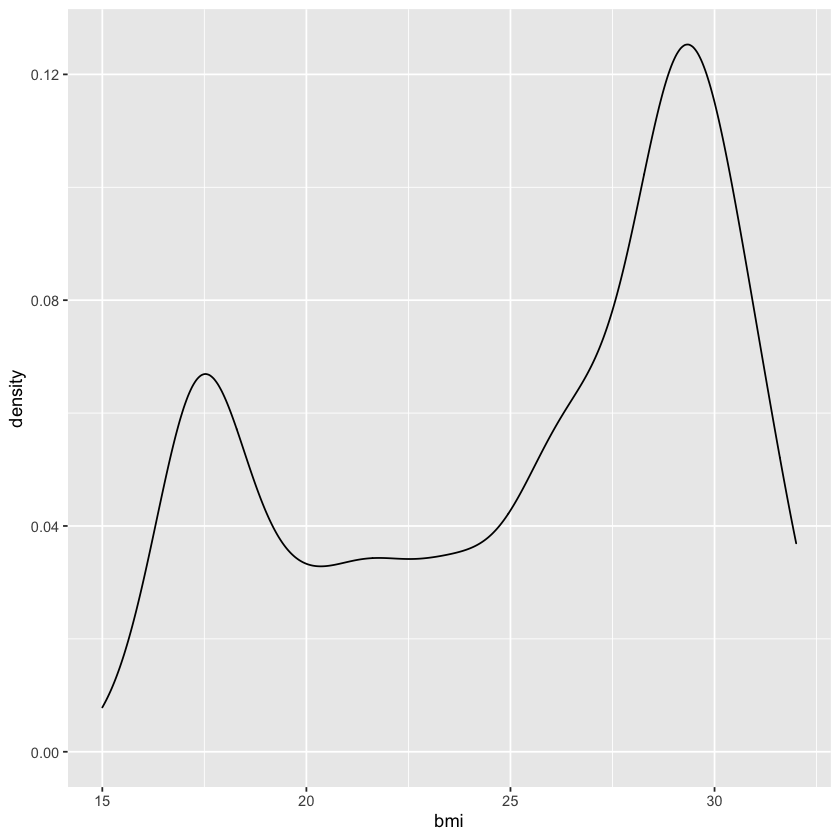

In [9]:
ggplot(health, aes(bmi)) + geom_density()

How would you describe the distribution you found in the previous command?
- It is a contionous, bimodal distribution, 

Do men and women differ in their BMI? First, run a T test via the `t.test()` command to answer this question **(2 points)**

In [10]:
t.test(health$bmi ~ health$gender, alternative = "two.sided")


	Welch Two Sample t-test

data:  health$bmi by health$gender
t = 3.2353, df = 1768.3, p-value = 0.001238
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2952488 1.2043522
sample estimates:
mean in group female   mean in group male 
            25.65755             24.90775 


- The H0, that man and woman do not differ in the BMI, can be rejected and the H1, that men and women do differ in their BMI can be accepted.

Can the results of your `t.test()` explain the shape of the distribution of BMI you found in the previous step? Add the `color=gender` argument in the `aes()` part of your previous `ggplot()` call to split the distribution by gender and answer this question **(3 points)**

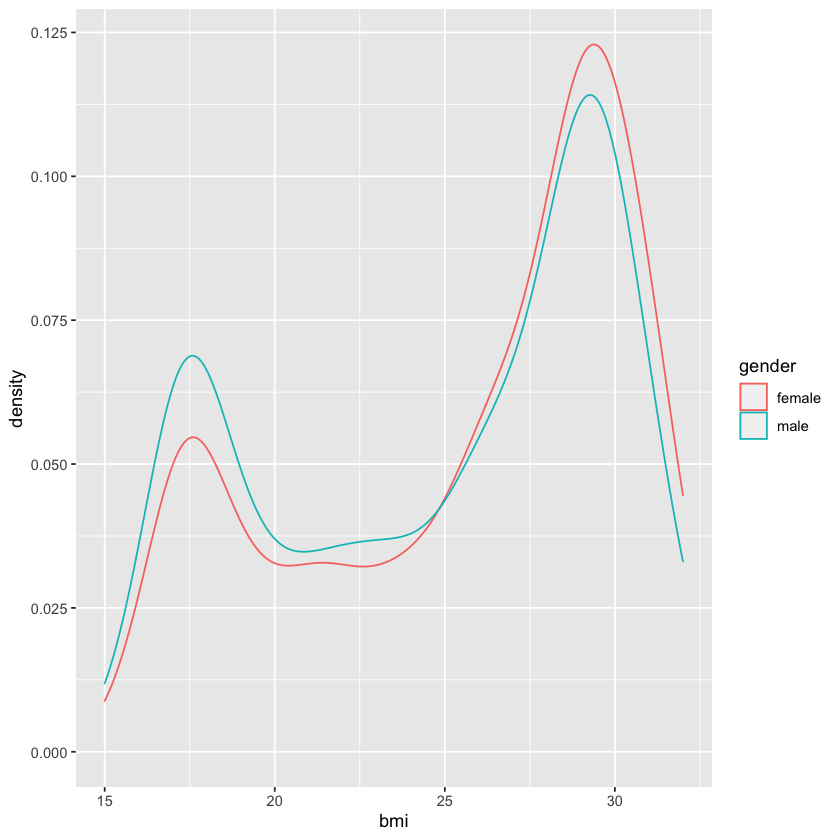

In [11]:
ggplot(health, aes(bmi, color = gender)) + geom_density()

- No, the shape of the distribution can not be explained by gender. The bimodal distribution exist in both male and female.

### Exploring the STEPS variable

Some errors were made when coding the steps variable. Plot a histogram of the `steps` variable. What is unusual about this data? **(2 points)**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



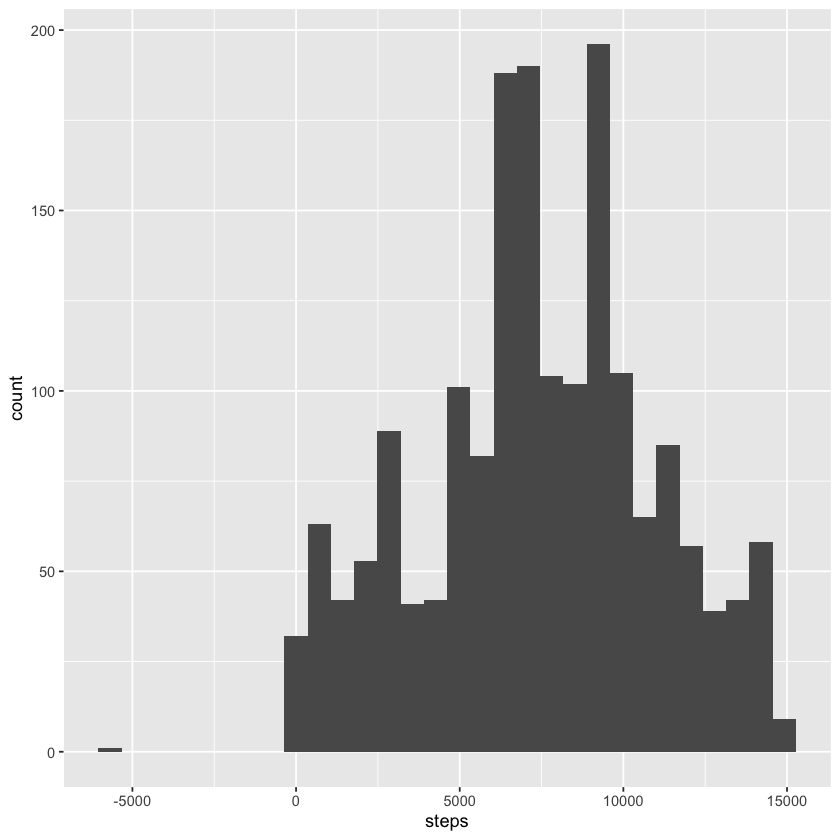

In [12]:
ggplot(health, aes(steps)) + geom_histogram()

- One observations measure abou -600 steps, but minus values are not possible in steps

One data point needs to be removed from this dataset. Use the `filter()` command on the `steps` variable to remove the incorrect data point, and save the result to a new data frame **(2 points)**

In [13]:
health_new <- health %>% filter(steps >=0)
head(health_new)

,gender,ID,steps,bmi
,<chr>,<int>,<int>,<dbl>
1,male,1,15000,16.9
2,male,2,15000,16.9
3,male,6,14861,16.8
4,male,7,14861,16.8
5,male,8,14699,17.3
6,male,10,14560,20.5


### The relationship between daily steps and BMI

Now that we understand how the individual variables are distributed, and that we have cleaned up the incorrectly coded data point, it's time to understand whether daily steps are related to BMI. 

Please use the `cor.test()` function to answer the following questions **(5 points)**
- *Is there a statistically significant correlation between daily steps and BMI*
- *Does the correlation between daily steps and BMI differ for men and women*

In [14]:
# Check if data has a normal distribution
shapiro.test(health_new$steps)
shapiro.test(health_new$bmi)

# results of Shapiro-Wilk Test indicate, that there is no normaldistribution in the data, 
# so I use the spearman method for the correlation test
cor.test(health_new$steps, health_new$bmi, alternative = 'two.sided', method = 'spearman')

# 2 subset for each gender, assigned to new variables
health_new_f <- subset(health_new, gender == 'female')
health_new_m <- subset(health_new, gender == 'male')

# correlation test for woman and men seperately 
cor.test(health_new_f$steps, health_new_f$bmi, alternative = 'two.sided', method = 'spearman')
cor.test(health_new_m$steps, health_new_m$bmi, alternative = 'two.sided', method = 'spearman')


	Shapiro-Wilk normality test

data:  health_new$steps
W = 0.9841, p-value = 3.541e-13



	Shapiro-Wilk normality test

data:  health_new$bmi
W = 0.88764, p-value < 2.2e-16


Warning message in cor.test.default(health_new$steps, health_new$bmi, alternative = "two.sided", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  health_new$steps and health_new$bmi
S = 1150795242, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.214045 


Warning message in cor.test.default(health_new_f$steps, health_new_f$bmi, alternative = "two.sided", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  health_new_f$steps and health_new_f$bmi
S = 160204726, p-value = 5.965e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2344219 


Warning message in cor.test.default(health_new_m$steps, health_new_m$bmi, alternative = "two.sided", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  health_new_m$steps and health_new_m$bmi
S = 126274324, p-value = 4.462e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1706271 


- The Spearman correlation test shows a (weak) significant, negative correlation between 'steps' and 'bmi' for the data including men and woman (-0.21).

- The Spearman correlation tests show a small difference between the correlation for men (-0.17) and  for woman (-0.23).

Finally, in addition to running a statistical correlation test, what else can you do to better understand the relationship between daily steps and BMI? How would you described this relationship? **(3 points)** 

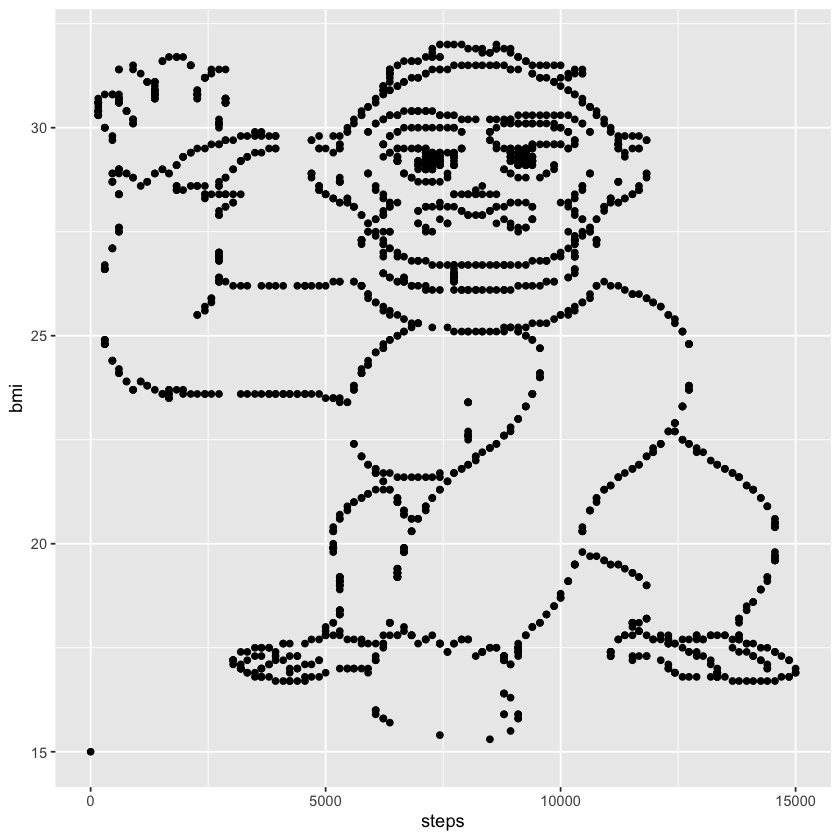

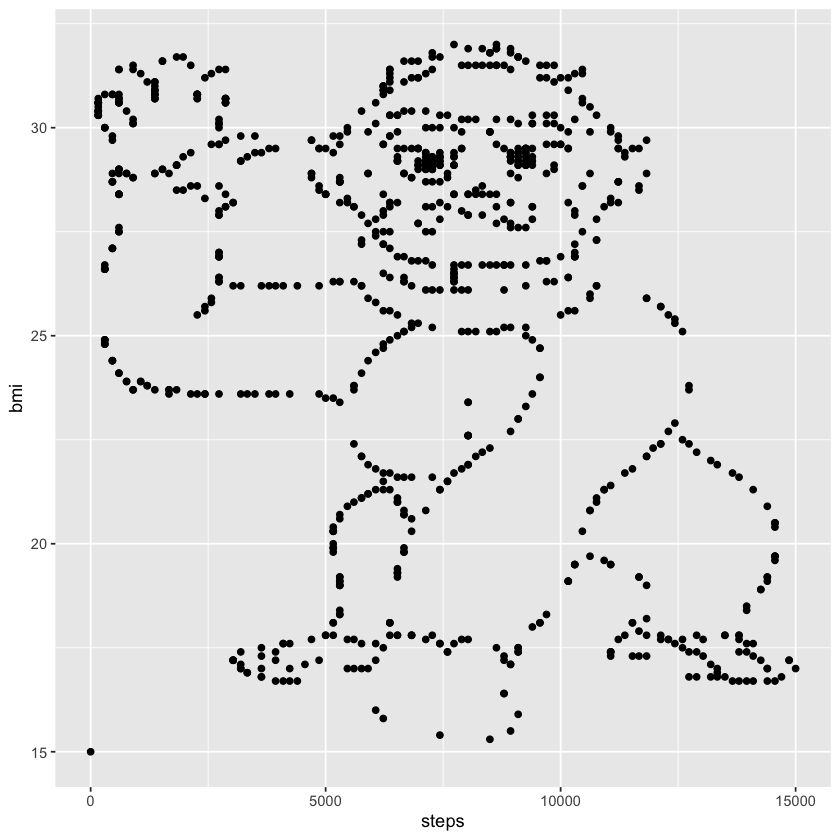

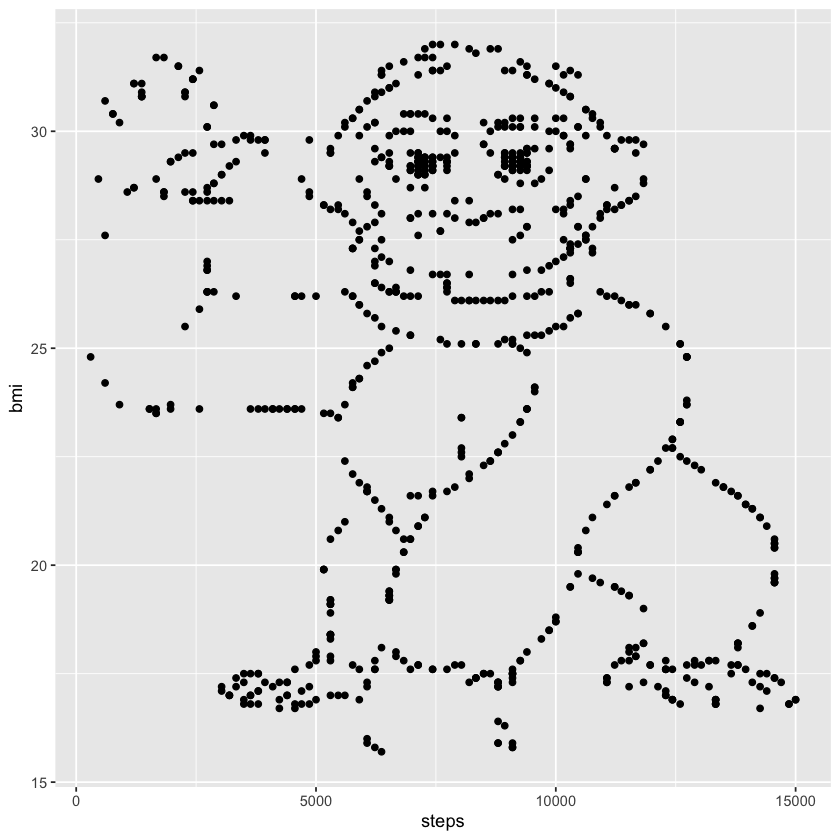

In [15]:
ggplot(health_new) + geom_point(aes(x= steps, y = bmi))
ggplot(health_new_f) + geom_point(aes(x= steps, y = bmi))
ggplot(health_new_m) + geom_point(aes(x= steps, y = bmi))

- Visualize the data with a scatterplot, there is obviously no linear correlation visible in the plot. I would describe the distribution 'figural'.